# **Data Exploration**

Import các thư viện cần thiết.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Đọc dữ liệu từ file csv.

In [5]:
# read file csv
df = pd.read_csv('../data/data.csv')
df.head()

,Age,Sex,Race,Marital status?,Education,Employement,Incomes,How many books did you read during last 12months?,Read any printed books during last 12months?,Read any audiobooks during last 12months?,Read any e-books during last 12months?,"Last book you read, you…",Do you happen to read any daily news or newspapers?,Do you happen to read any magazines or journals?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


## 1. DỮ LIỆU CÓ BAO NHIÊU DÒNG, BAO NHIÊU CỘT?

In [7]:
print(f"Kích thước dữ liệu : {df.shape}")

Kích thước dữ liệu : (2832, 14)


## 2. KHÁM PHÁ CÁC DÒNG DỮ LIỆU

### 2.1 Mỗi dòng có ý nghĩa gì? Có dòng nào có ý nghĩa khác với các dòng còn lại hay không? 

- Mỗi dòng là thông tin về người khảo sát như và thói quen đọc sách của một người trong vòng 12 tháng vừa qua.

- Không có dòng nào có ỹ nghĩa khác so với các dòng còn lại.

### 2.2 Có dòng nào bị trùng không? 

In [12]:
print(f"Số dòng bị trùng: {df.duplicated().sum()}")

Số dòng bị trùng: 1


- Kết quả cho thấy rằng có 1 dòng bị trùng. Nhóm tiến hành xóa bỏ dòng bị trùng đó.

In [14]:
df = df.drop_duplicates()

print(f"Kiểm tra lại số dòng bị trùng: {df.duplicated().sum()}")

Kiểm tra lại số dòng bị trùng: 0


## 3. KHÁM PHÁ CÁC CỘT DỮ LIỆU

### 3.1 Dữ liệu có những cột nào ? 

In [17]:
df.columns

Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?'],
      dtype='object')

- Như mô tả về ý nghĩa các dòng dữ liệu ở trên, dữ liệu chứa các câu hỏi khảo sát về thói quen đọc sách trong vòng 12 tháng qua nên cụm từ "last 12 months" xuất hiện khá nhiều. Điều này làm cho các cột có ý nghĩa rõ ràng hơn nhưng đồng thời khiến tên cột trở nên dài 1 cách không cần thiết và gây khó cho việc trực quan. Vì vậy, nhóm quyết định đổi tên cột dữ liệu cho ngắn hơn như dưới đây để tiện cho quá trình làm việc nhưng không làm mất đi ý nghĩa các cột.

In [19]:
df.rename(columns={'Marital status?': 'Marital status'}, inplace=True)
df.rename(columns={'Last book you read, you…': 'Source of the last book read'}, inplace=True)
df.rename(columns={'How many books did you read during last 12months?': 'Number of books read'}, inplace= True)
df.rename(columns={'Read any printed books during last 12months?':'Printed books?'}, inplace=True)
df.rename(columns={'Read any audiobooks during last 12months?': 'Audiobooks?'}, inplace=True)
df.rename(columns={'Read any e-books during last 12months?':'E-books?'}, inplace=True)
df.rename(columns={'Do you happen to read any daily news or newspapers?':'Daily news/newspapers reader?'}, inplace=True)
df.rename(columns={'Do you happen to read any magazines or journals?':'Magazines/Journals reader?'}, inplace=True)
df.rename(columns={'Employement': 'Employment'}, inplace=True)

- Trong quá trình làm việc, nhóm thấy rằng dữ liệu có nhiều giá trị cũng có tên rất dài, vì vậy nhóm cũng làm tương tự với tên cột là thay đổi các giá trị cho ngắn hơn và phù hợp mục đích trực quan hóa hơn.

In [21]:
value_mapping = {
    'Native American/American Indian' : 'Native American',
    'Asian or Pacific Islander' : 'Asian/Pacific Islander',
    'Black or African-American': 'Black/African-American',
    'High school graduate': 'High school',
    'College graduate': 'College', 
    'Some college, no 4-year degree': 'Some college',
    'High school incomplete' : 'Some high school',
    'Post-graduate training/professional school after college': 'Post-graduate',
    'Technical, trade or vocational school AFTER high school': 'Trade school',
    'Have own business/self-employed':'Self-employed',
    'Not employed for pay': 'Unemployed',
    'Purchased the book': 'Purchased',
    'Borrowed the book from a friend or family member': 'Borrowed from others',
    'Borrowed the book from a library': 'Borrowed from library',
    'Got the book some other way': 'Other sources',
    'Less than $10,000': '<$10k',
    '$10,000 to under $20,000': '$10k-20k',
    '$20,000 to under $30,000': '$20k-30k',
    '$30,000 to under $40,000': '$30k-40k',
    '$40,000 to under $50,000': '$40k-50k',
    '$50,000 to under $75,000': '$50k-75k',
    '$75,000 to under $100,000': '$75k-100k',
    '9$100,000 to under $150,000': '$100k-150k',
    '$100,000 to under $150,000': '$100k-150k' 
}

df.replace(value_mapping, inplace = True)

### 3.2 Ý nghĩa các cột dữ liệu

Mỗi cột dữ liệu có ý nghĩa như trong bảng dưới đây.

|**TÊN CỘT**|**Ý NGHĨA**|
|-----------|-------|
| Age| Tuổi của người tham gia khảo sát|
| Sex| gender of the respondent|
| Race| the racial or ethnic background of the respondent|
| Marital status| the current marital status of the respondent|
| Education| the highest level of education completed by the respondent|
| Employement| the employment status of the respondent|
| Income| the income level of the respondent|
| Number of books read| the total number of books the respondent has read in the past year|
| Printed books?| a yes/no question indicating whether the respondent has read any printed books (physical books) in the past year|
| Audiobooks?| a yes/no question indicating whether the respondent has read any audiobooks in the past year|
| E-books?| a yes/no question indicating whether the respondent has read any electronic books in the past year|
| Source of the last book read| the method the respondent used to get the book he/she most recently read|
| Daily news/newspapers reader?| a yes/no question indicating whether the respondent reads daily news sources or newspapers|
| Magazines/Journals Reader?| a yes/no question indicating whether the respondent reads magazines or academic journals|


### 3.3 Kiểu dữ liệu hiện tại của các cột là gì? Có cột nào có kiểu dữ liệu không phù hợp hay không?

- Kiểu dữ liệu hiện tại của các cột:

In [27]:
column_types = df.dtypes
column_types

Age                               int64
Sex                              object
Race                             object
Marital status                   object
Education                        object
Employment                       object
Incomes                          object
Number of books read              int64
Printed books?                   object
Audiobooks?                      object
E-books?                         object
Source of the last book read     object
Daily news/newspapers reader?    object
Magazines/Journals reader?       object
dtype: object

- Kiểu dữ liệu hiện tại đã phù hợp.

### 3.4 Tỉ lệ dữ liệu bị thiếu của các cột

In [30]:
for col in df.columns:
    print(f'{col}: {df[col].isnull().mean()}')

Age: 0.0
Sex: 0.0
Race: 0.0
Marital status: 0.0
Education: 0.020487460261391734
Employment: 0.0
Incomes: 0.0
Number of books read: 0.0
Printed books?: 0.1377605086541858
Audiobooks?: 0.1377605086541858
E-books?: 0.1377605086541858
Source of the last book read: 0.1377605086541858
Daily news/newspapers reader?: 0.0
Magazines/Journals reader?: 0.0


- Nhận xét: Tỉ lệ thiếu này khá lớn và các thông tin thiếu đều trong cùng 1 dòng nên việc điền bằng bất kì phương pháp nào đều có thể dấn tới làm sai lệch dữ liệu. Nhóm quyết định xóa hết các dòng này.

In [32]:
df.dropna(inplace=True)

## 4. THỐNG KÊ CHO CÁC CỘT KIỂU NUMERICAL

### 4.1 Các cột kiểu numerical trong dữ liệu

In [35]:
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
numerical_columns

['Age', 'Number of books read']

### 4.2 Tính chất của các cột

|**Tên cột**|**Phân phối**|
|-----------|-------------|
|Age| Liên tục|
|Number of books read| Rời rạc|

### 4.3 Tính toán giá trị thống kê. Dữ liệu có bất thường không? 

In [39]:
df.describe()

,Age,Number of books read
count,2411.000000,2411.000000
mean,46.591456,19.462878
std,18.482184,24.511657
min,16.000000,1.000000
25%,31.000000,4.000000
50%,47.000000,10.000000
75%,61.000000,24.500000
max,93.000000,97.000000


### 4.4 Trực quan hóa phân phối dữ liệu

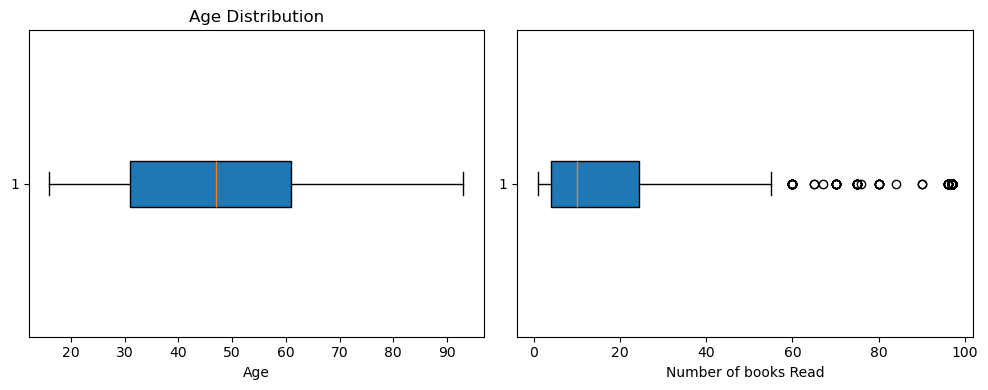

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# 1. Boxplot for 'Age'
axes[0].boxplot(df['Age'], vert=False, patch_artist=True)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')

# 2. Boxplot for 'Number of books read'
axes[1].boxplot(df['Number of books read'], vert=False, patch_artist=True)
axes[1].set_xlabel('Number of books Read')

plt.tight_layout()
plt.show()

- Nhận xét: ...

## 5. THỐNG KÊ CHO CÁC CỘT KIỂU PHÂN LOẠI

### 5.1 Các cột kiểu categorical

In [45]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['Sex',
 'Race',
 'Marital status',
 'Education',
 'Employment',
 'Incomes',
 'Printed books?',
 'Audiobooks?',
 'E-books?',
 'Source of the last book read',
 'Daily news/newspapers reader?',
 'Magazines/Journals reader?']

### 5.2 Tính chất của các cột

|**Tên cột**|**Tính chất**|
|-----------|-------------|
|Sex| Không có thứ tự|
|Race| Không có thứ tự|
|Marital status| Không có thứ tự|
|Education| Không có thứ tự|
|Employment| Không có thứ tự|
|Incomes| Có thứ tự|
|Printed books?| Không có thứ tự|
|Audiobooks?| Không có thứ tự|
|E-books?| Không có thứ tự|
|Source of the last book read| Không có thứ tự|
|Daily news/newspapers reader?| Không có thứ tự|
|Magazines/Journals Reader?| Không có thứ tự|

### 5.3 Các giá trị của từng cột

In [83]:
unique_values_categorical = {col: df[col].unique()[:5] for col in categorical_columns}
num_unique_values = df[categorical_columns].nunique()
print("Số lượng giá trị khác nhau trong mỗi cột phân loại:")
print(num_unique_values)
print("\nMột vài giá trị khác nhau trong các cột phân loại:")
for col, values in unique_values_categorical.items():
    print(f"{col}: {values}")

Số lượng giá trị khác nhau trong mỗi cột phân loại:
Sex                              2
Race                             6
Marital status                   7
Education                        6
Employment                       8
Incomes                          8
Printed books?                   2
Audiobooks?                      2
E-books?                         2
Source of the last book read     4
Daily news/newspapers reader?    2
Magazines/Journals reader?       2
dtype: int64

Một vài giá trị khác nhau trong các cột phân loại:
Sex: ['Male' 'Female']
Race: ['Native American' 'Mixed race' 'Asian/Pacific Islander'
 'Black/African-American' 'White']
Marital status: ['Married' 'Never been married' 'Divorced' 'Widowed'
 'Living with a partner']
Education: ['High school' 'Some high school' 'Some college' 'College' 'Post-graduate']
Employment: ['Employed full-time' 'Employed part-time' 'Self-employed' 'Retired'
 'Student']
Incomes: ['<$10k' '$40k-50k' '$10k-20k' '$50k-75k' '$100k-150k']
Pr

### 5.4 Trực quan hóa phân phối dữ liệu

In [55]:
def create_category_dict(cat_stats):
    category_dict = {}
    for col in cat_stats['column'].unique():
        col_data = cat_stats[cat_stats['column'] == col]
        category_dict[col] = {
            'values': col_data['value'].tolist(),
            'counts': col_data['count'].tolist()
        }
    return category_dict

category_dict = create_category_dict(cat_dis_df)

/var/folders/wc/y6_xwvh51zg9cvyj6v873gn40000gn/T/ipykernel_6921/1807845607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/wc/y6_xwvh51zg9cvyj6v873gn40000gn/T/ipykernel_6921/1807845607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/wc/y6_xwvh51zg9cvyj6v873gn40000gn/T/ipykernel_6921/1807845607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/wc/y6_xwvh51zg9cvyj6v873gn40000gn/T/ipykernel_6921/1807845607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

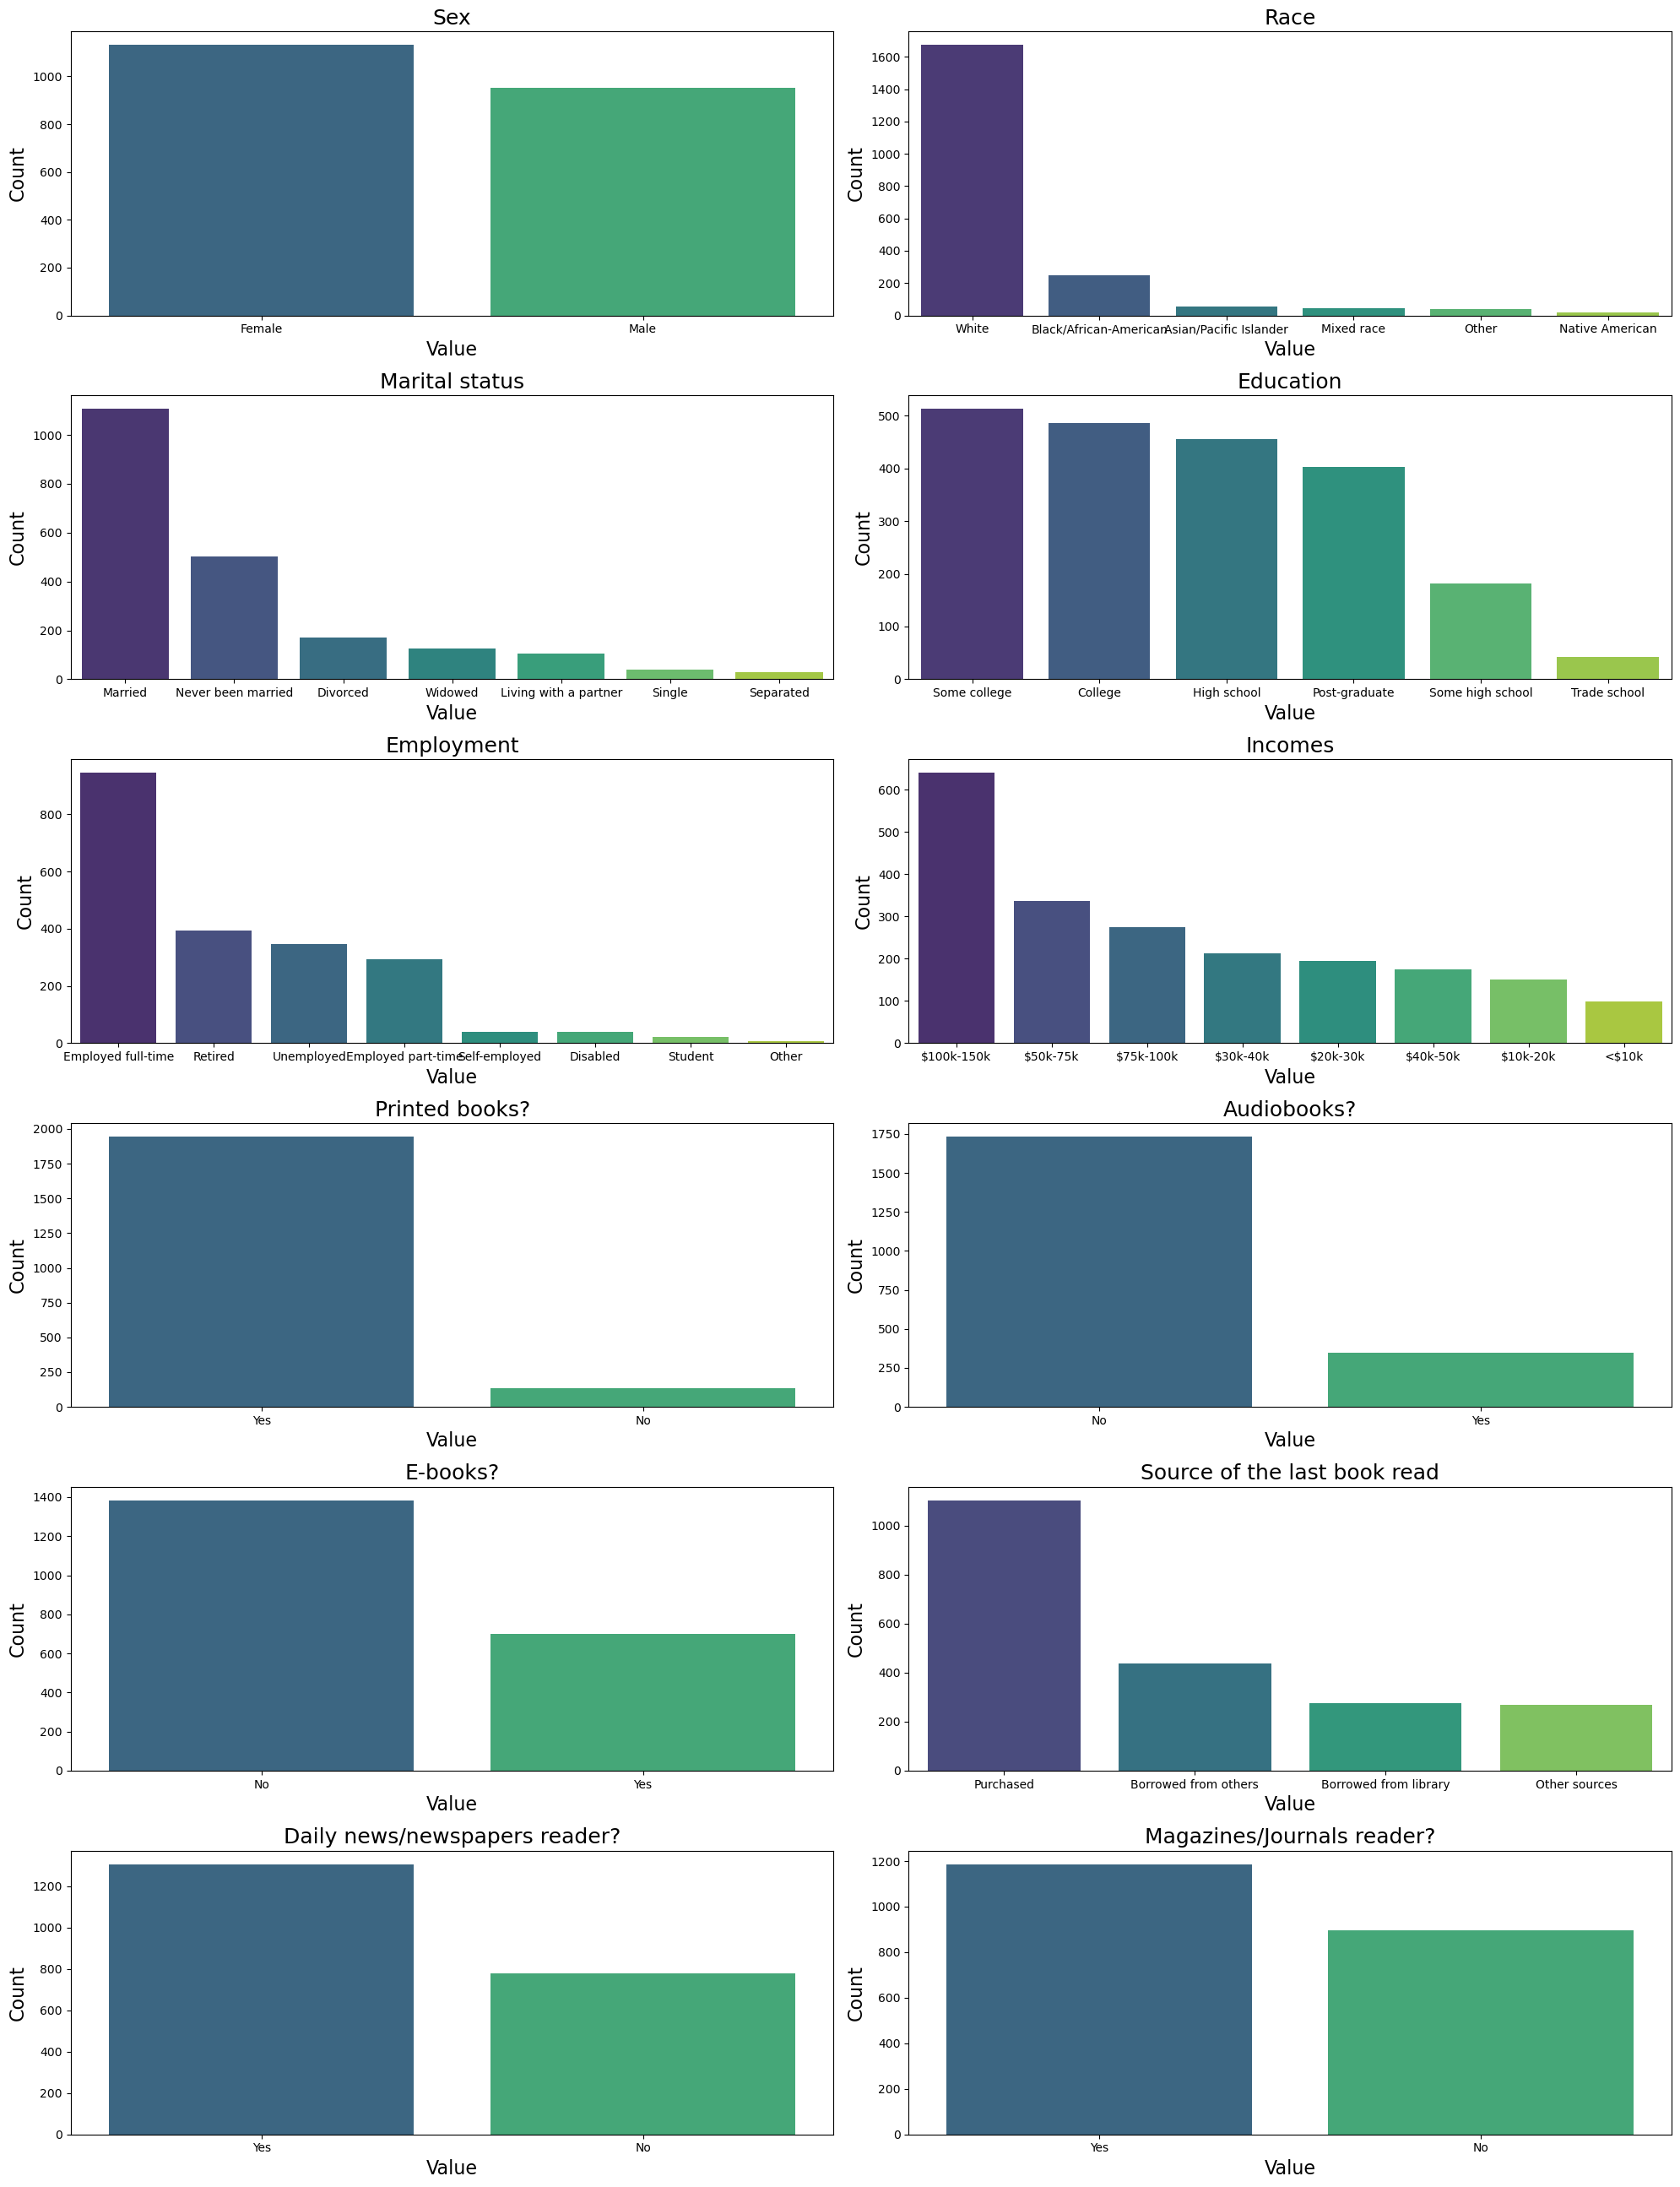

In [56]:
# from matplotlib.gridspec import GridSpec
def plot_from_dict(category_dict):
    fig, axes = plt.subplots(6, 2, figsize=(20, 26))
    axes = axes.flatten()  # biến mảng 2D của axes thành 1D để dễ truy cập
    
    for idx, (col, data) in enumerate(category_dict.items()):
        sns.barplot(
            x=data['values'],
            y=data['counts'],
            ax=axes[idx],
            palette='viridis'
        )
        axes[idx].set_title(f"{col}", fontsize=18)
        axes[idx].set_xlabel('Value', fontsize=16)
        axes[idx].set_ylabel('Count', fontsize=16)
        axes[idx].tick_params(axis='x')

    for idx in range(len(category_dict), 6 * 2):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_from_dict(category_dict)


## 6. LƯU DỮ LIỆU ĐÃ ĐƯỢC TIỀN XỬ LÝ

In [58]:
df.to_csv('../data/cleaned_data.csv', index=False)